<a href="https://colab.research.google.com/github/marcus-wuertz/Analytics-Code/blob/main/DS4220_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## $\color{darkRed}{\text{Question 1}}$

In [ ]:
#install.packages(c('vtable', 'readxl'))
library('vtable')
library('readxl')

#Use Readxl function to read data
credit_risk_data <-read_excel('/content/sample_data/CreditRiskData.xlsx')

# Get summary statistics for savings variable
summary(credit_risk_data$Savings)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     228     596    1813     921   19811 

## $\color{darkRed}{\text{Question 2}}$

In [ ]:
# compute percentile for the savings variable
print(quantile(credit_risk_data$Savings, probs=c(0.05, 0.25, 0.50, 0.75, 0.95)))

     5%     25%     50%     75%     95% 
    0.0   228.0   596.0   921.0 11380.8 


a: From the 25th percentile, we know that 25% of the values in the data are below 228. This information is on the savings variable, so it does not inherently say anything about whether or not they will default. However, computing the R squared in excel shows you that savings is not a significant predictor of credit default.

## $\color{darkRed}{\text{Question 3}}$

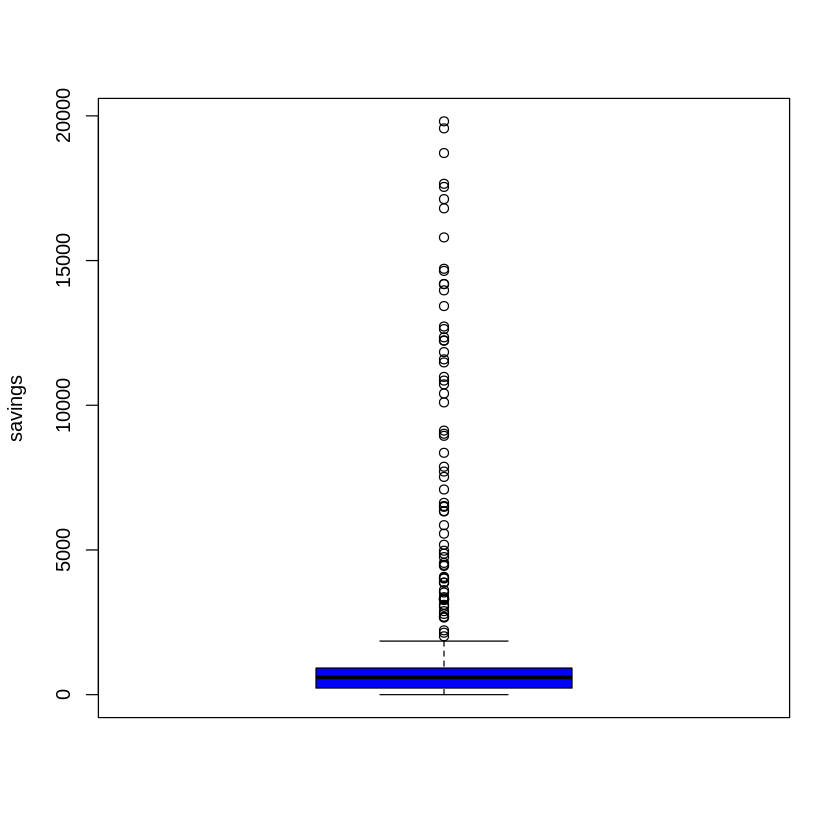

In [ ]:
# plot the boxplot
boxplot(credit_risk_data$Savings, col = 'blue', ylab = 'savings')

The boxplot is just a visualization of the quartiles, it shows the 'minimum', 25th percentile, 50th percentile, 75th percentile, and your 'maximum' as well as any outliers. This particular data has quite a few outliers in the upper portion. This data also tells us nothing about whether or not they will default because it's about the savings variable. This boxplot is peculiar because it's entirely contained below 5000, with several outliers.

## $\color{darkRed}{\text{Question 4}}$

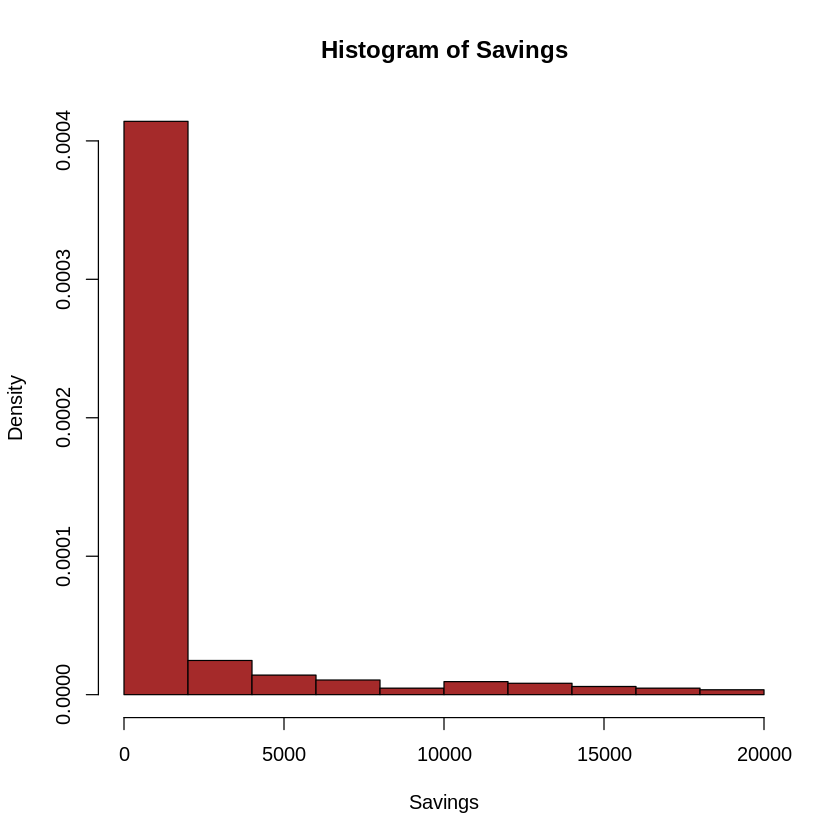

In [ ]:
options(scipen = 10000)
hist(credit_risk_data$Savings, col = 'brown', , xlab = 'Savings',main='Histogram of Savings',freq = FALSE)

This tells us a great deal about our data, and clears up some questions left by the unusual boxplot. The vast majority of the data all fall in the lowest range, which is why it looks like we have so many outliers on the boxplot. This still tells us nothing about whether or not they will default.

## $\color{darkRed}{\text{Question 5}}$

,credit_risk_data$Job,n,percent
,<chr>,<dbl>,<chr>
1,Management,54,12.71%
2,Skilled,271,63.76%
3,Unemployed,11,2.59%
4,Unskilled,89,20.94%
5,Total,425,100.00%


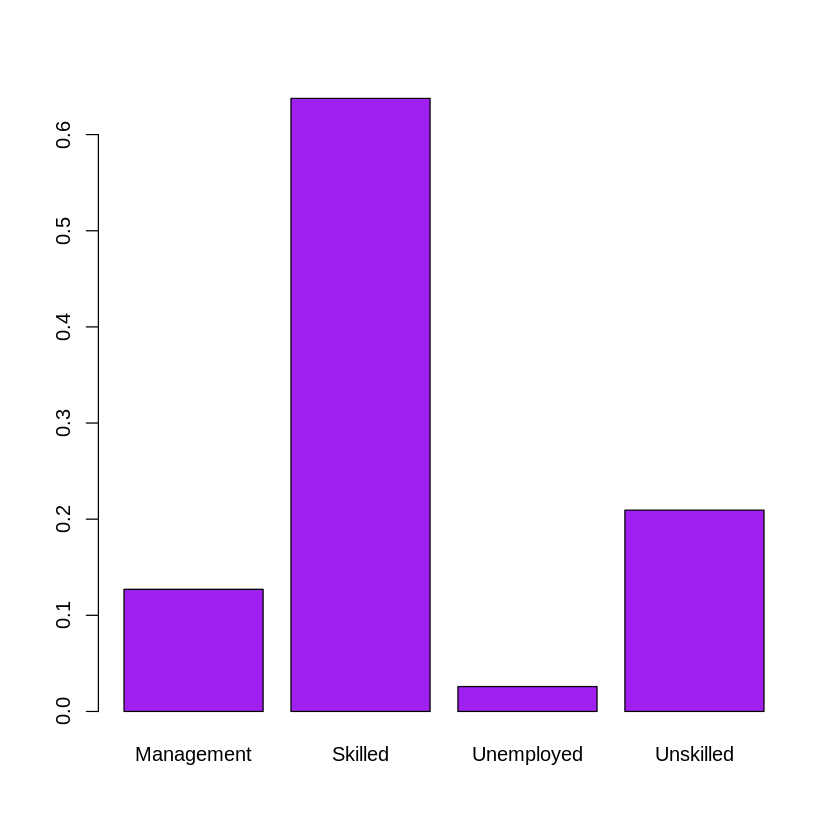

In [ ]:
#install.packages('janitor')
library('janitor')

#create frequency table for the job variable
tabyl(credit_risk_data$Job) %>%
  adorn_totals('row') %>%
  adorn_pct_formatting(digits = 2)

# create a bar chart
barplot(prop.table(table(credit_risk_data$Job)), col='purple')

## $\color{darkRed}{\text{Question 6}}$

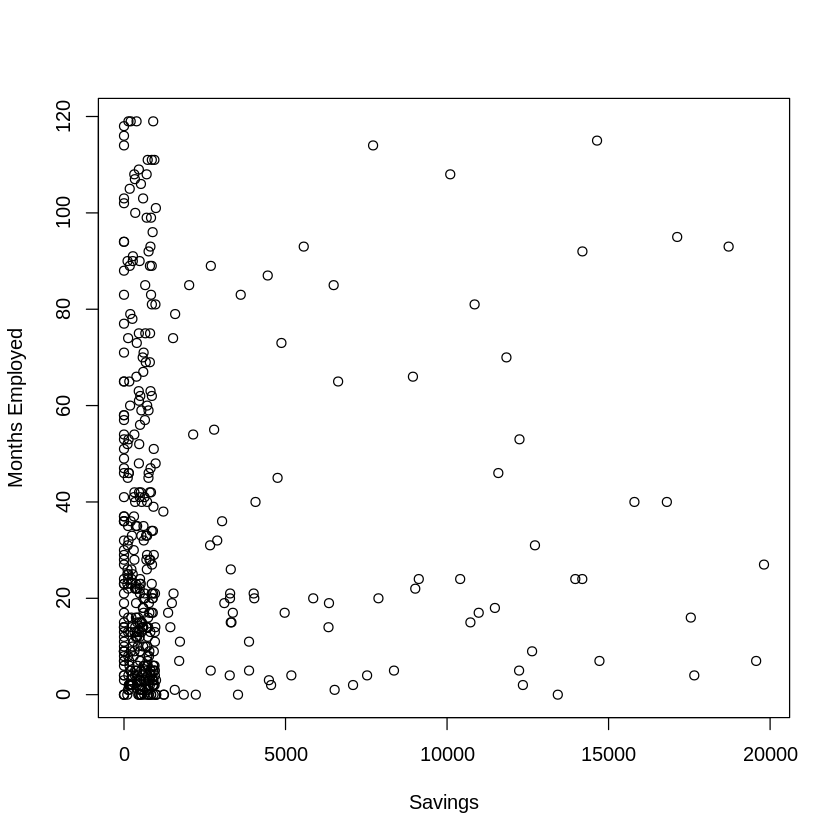

In [ ]:
# create a scatterplot of the savings and months employed variable
plot(credit_risk_data$Savings,credit_risk_data$`Months Employed`, xlab = 'Savings', ylab = 'Months Employed', col = 'black')

This scatter plot is very interesting because despite what you may assume, there does not seem to be much of a correlation between months employed and savings. The savings data is almost entirely below 5000, thus it makes sense that as months go up, the amount saved typically does not. The scatter plot shows us that these variables are not significantly related.

## $\color{darkRed}{\text{Question 7}}$

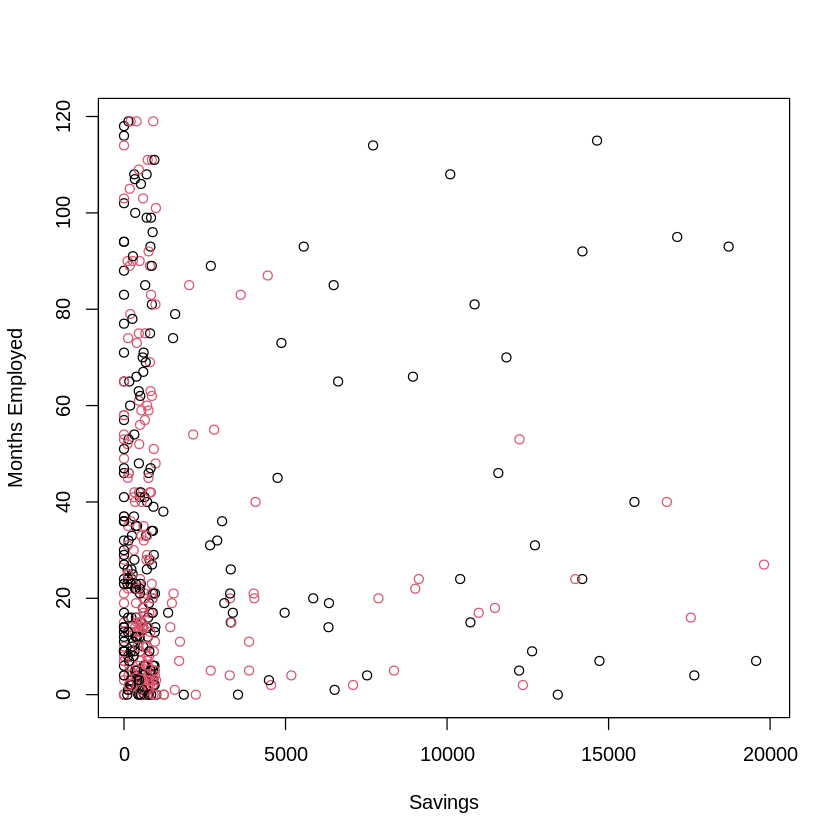

In [ ]:
options(scipen = 10000)
plot(credit_risk_data$Savings,credit_risk_data$`Months Employed`, xlab = 'Savings', ylab = 'Months Employed', col = factor(credit_risk_data$`Credit Risk`))

This tells us that the data are not correlated, and thus are not a good measure of whether or not someone is likely to default. The color shows that there are defaults all accross the board, and thus savings are not a good predictor of credit risk.

## $\color{darkRed}{\text{Question 8}}$

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



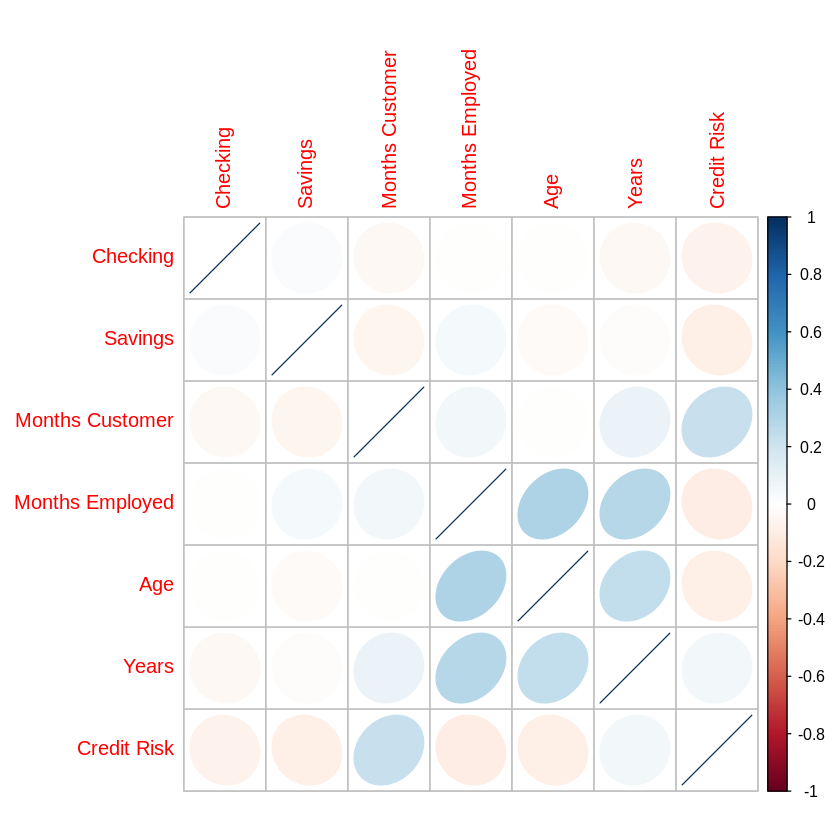

In [ ]:
#install.packages('corrplot')
library('corrplot')

#get all numeric variables from the data
cred_numeric <-Filter(is.numeric, credit_risk_data)

#Correlation Plot
corrplot(cor(cred_numeric), method = 'ellipse')

## $\color{darkRed}{\text{Question 9}}$

In [ ]:
#install.packages('descr')
library('descr')

# get a crosstab between the job and marital status
crossTab <- CrossTable(credit_risk_data$Job,credit_risk_data$`Marital Status`,prop.c=FALSE,
                      prop.chisq=FALSE, prop.t=FALSE)
crossTab

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

                        credit_risk_data$`Marital Status`
credit_risk_data$Job    Divorced   Married   Single   Total
-----------------------------------------------------------
Management                    15         2       37      54
                           0.278     0.037    0.685   0.127
-----------------------------------------------------------
Skilled                      102        24      145     271
                           0.376     0.089    0.535   0.638
-----------------------------------------------------------
Unemployed                     7         1        3      11
                           0.636     0.091    0.273   0.026
-----------------------------------------------------------
Unskilled                     32         9       48      89
                           0.360     0.101    0.539   0.209
-----------------------------

From this data, we can tell that the majority of the Job categories have 'single' as their highest percentage. We can also see that unemployed people seem to have a much smaller portion that are single and a much greater portion that are divorced than the other job groups. Managers seem to have a significantly smaller portion that are married, wiwth only 3.7% of managers falling in that category.

## $\color{darkRed}{\text{Question 10}}$

In [ ]:
#install.packages('dplyr')
library('dplyr')
by_status <- credit_risk_data %>%
  group_by(Job) %>%
  summarize(nobs=n(),
            nobs_pct=nobs/sum(nobs),
            avg_savings=mean(Savings, na.rm = TRUE),
            min_savings=min(Savings),
            max_savings=max(Savings))

by_status

Job,nobs,nobs_pct,avg_savings,min_savings,max_savings
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Management,54,1,1616.833,0,18716
Skilled,271,1,1836.428,0,19811
Unemployed,11,1,2760.909,0,13428
Unskilled,89,1,1741.438,0,13970


## $\color{darkRed}{\text{Question 11}}$

In [ ]:
#install.packages('mosaic')
library(mosaic)

#do a single bootstrap sample of the savings variable
cred_boot <- mosaic::resample(credit_risk_data)

#get average savings across credit risk
print(mean(Savings ~ `Credit Risk`, data=credit_risk_data))

#getting the mean difference
cat('\nMean Difference:', diffmean(Savings ~ `Credit Risk`, data = credit_risk_data))

       0        1 
2132.617 1487.957 

Mean Difference: -644.6595

a) the mean difference across credit risk is -644.6595. The average savings are larger among the group that did not default as opposed to the ones who did.

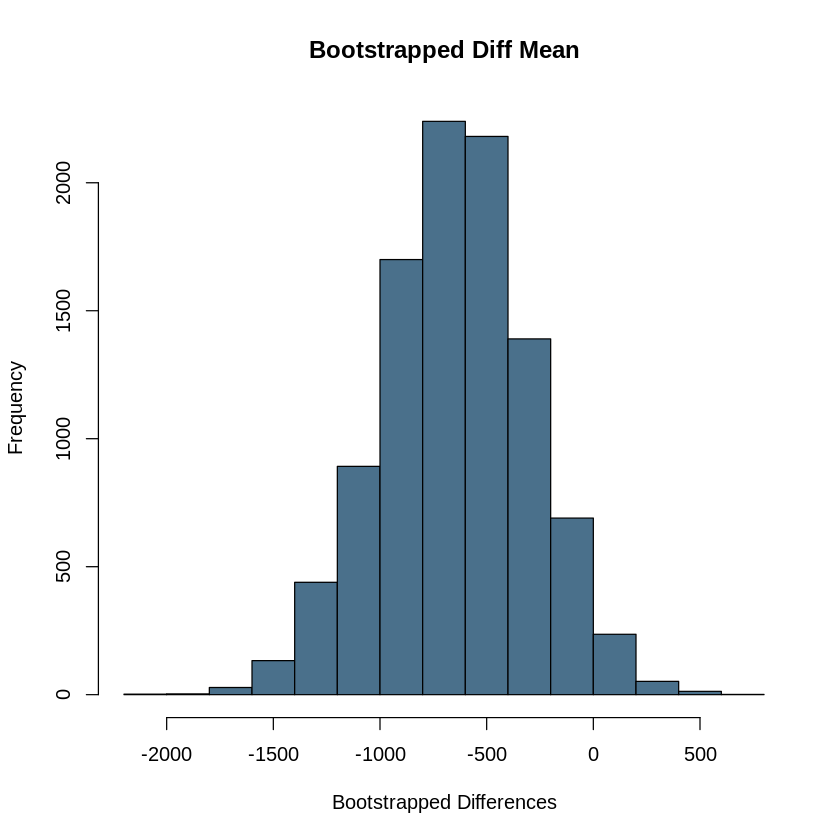

In [ ]:
# construct 10000 bootstrap samples of the difference
cred_samples <- do(10000)*diffmean(Savings ~ `Credit Risk`, data = mosaic::resample(credit_risk_data))

#provide a histogram of the mean difference
hist(cred_samples$diffmean, col = 'skyBlue4', main='Bootstrapped Diff Mean', xlab = 'Bootstrapped Differences')

In [ ]:
#compute standard error
cred_samples %>%
  summarize(Savings_StdErr = sd(diffmean))

# Confidence interval
print(confint(cred_samples, level = 0.99))

Savings_StdErr
<dbl>
347.2493


      name     lower    upper level     method  estimate
1 diffmean -1549.687 223.7708  0.99 percentile -1116.447
